In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [2]:
# Set Parameters
n_samples = 1000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [3]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [4]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [5]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

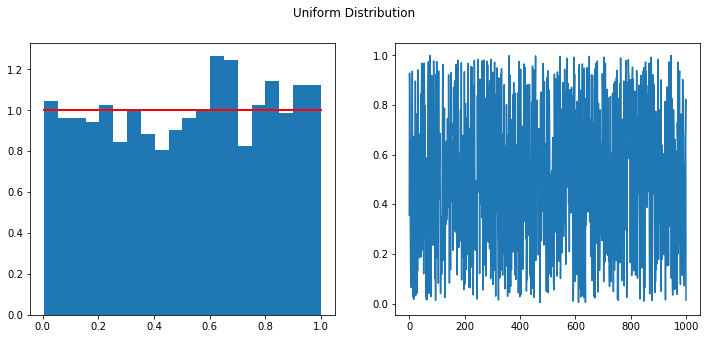

In [6]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

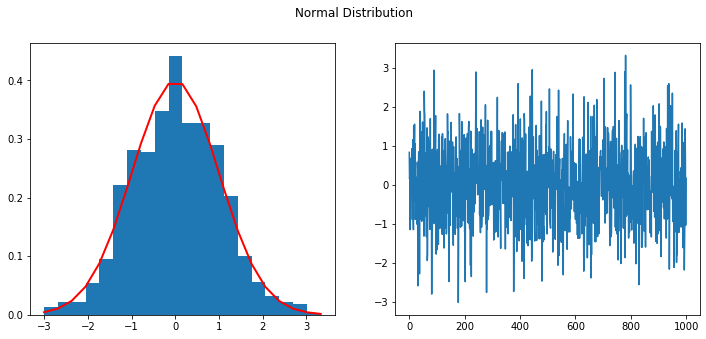

In [7]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

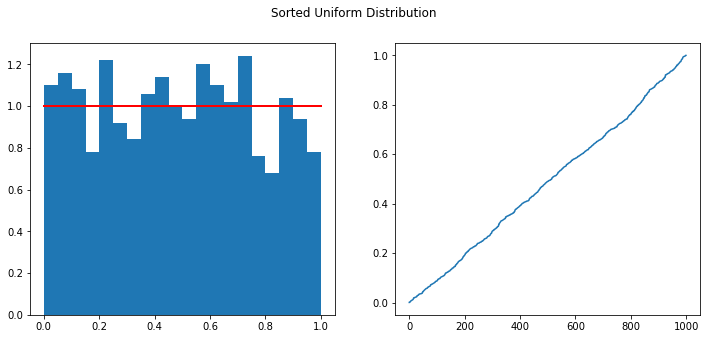

In [8]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

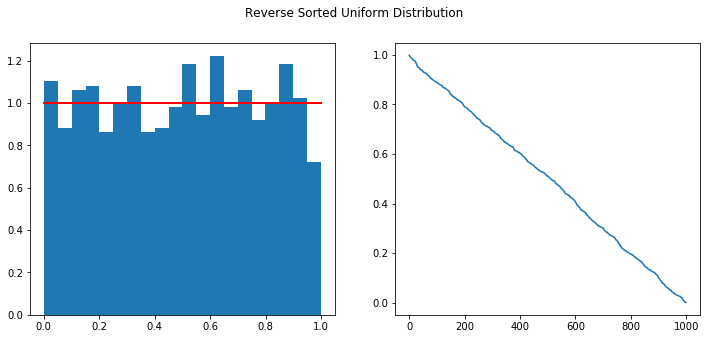

In [9]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

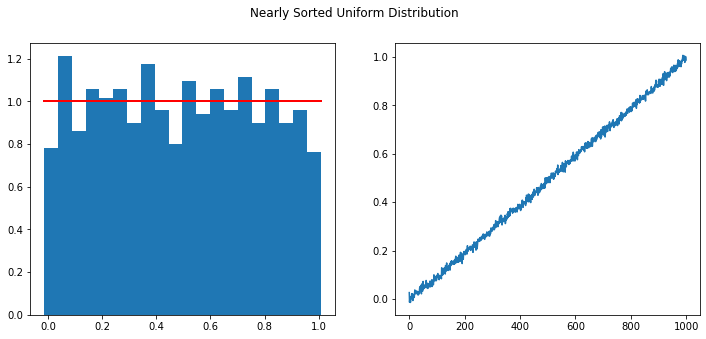

In [10]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

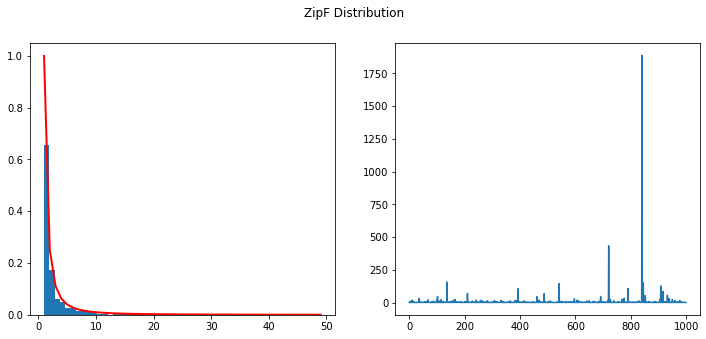

In [11]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [12]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [13]:
df_distribions = create_df_distributions()

In [14]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf,Strings,Dates,Repetetive_Numbers
0,0.094675,-0.449122,0.003470,0.999783,-0.005849,1,qf8,2018-11-09 15:25:10.650825,54
1,0.240261,-0.599193,0.004642,0.999753,-0.003388,2,wbf,2020-07-15 15:25:10.650825,77
2,0.315487,-0.985479,0.004783,0.999606,-0.015247,3,t9g,2020-05-14 15:25:10.650825,53
3,0.262441,0.119649,0.005930,0.999385,0.015227,2,w1j,2019-05-15 15:25:10.650825,64
4,0.812099,-0.088498,0.006341,0.998979,0.015456,1,asg,2019-12-17 15:25:10.650825,54


In [15]:
def evaluate_sorts(distribution="Uniform", second_col = None, repetitions=1000):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = time.perf_counter()
                df_distribions.sort_values([distribution],kind=sorting_algorithm)
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = time.perf_counter()
                df_distribions.sort_values([distribution, second_col],kind=sorting_algorithm)
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.mean(algorithm_times), "miliseconds")
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [16]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers_uniform = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 0.0028068106999999324 miliseconds
It has a STD of 0.0005312088837317249
The time of mergesort is 0.0029532670000000536 miliseconds
It has a STD of 0.0005725495786663495
The time of heapsort is 0.0026485884000000226 miliseconds
It has a STD of 0.0004252842429783307


In [17]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers_string = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 0.0031044062000001134 miliseconds
It has a STD of 0.00028834007293723855
The time of mergesort is 0.003119326500000227 miliseconds
It has a STD of 0.0005896748118478773
The time of heapsort is 0.003092690900000065 miliseconds
It has a STD of 0.00020278192766462166


In [18]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers_uf_reverse = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 0.002362228099999868 miliseconds
It has a STD of 0.00020387873925537344
The time of mergesort is 0.0023769371999998157 miliseconds
It has a STD of 0.0001799459080837281
The time of heapsort is 0.0023533755999999356 miliseconds
It has a STD of 0.00015933084542762616


In [19]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers_uf_nearly = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 0.0024015813999998274 miliseconds
It has a STD of 0.00027213983485326623
The time of mergesort is 0.002386431700000827 miliseconds
It has a STD of 0.00019988835465076409
The time of heapsort is 0.0023660818999996706 miliseconds
It has a STD of 0.00015299990713144946


In [20]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 0.0010549268999996
It has a STD of 9.001495068349865e-05
The time of mergesort is 0.0010758324000005074
It has a STD of 7.518495840432212e-05
The time of heapsort is 0.0010884737000010603
It has a STD of 9.134471806438895e-05


In [21]:
print("Dates")
df_dates = evaluate_sorts(distribution="Dates")

Dates
The time of quicksort is 0.0010978597000004414
It has a STD of 9.073032704589546e-05
The time of mergesort is 0.001103165699999778
It has a STD of 7.756256489862942e-05
The time of heapsort is 0.001113975199999288
It has a STD of 8.564664409514147e-05


In [22]:
print("Strings")
df_strings = evaluate_sorts(distribution="Strings")

Strings
The time of quicksort is 0.0015536760999991087
It has a STD of 0.00017236284239614117
The time of mergesort is 0.0015612234999994711
It has a STD of 0.0001222896168843922
The time of heapsort is 0.0017501683999986426
It has a STD of 0.00011960042291436026


In [23]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 0.0010952007999998727
It has a STD of 8.234452476810046e-05
The time of mergesort is 0.0010977504000014733
It has a STD of 7.275223776554354e-05
The time of heapsort is 0.001111299600000791
It has a STD of 8.949364915938446e-05


In [24]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 0.0011103538999989269
It has a STD of 0.0001709627775421183
The time of mergesort is 0.0011509925000003705
It has a STD of 0.00025480485229656104
The time of heapsort is 0.001109294699999225
It has a STD of 7.955253963074302e-05


In [25]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.0010837756000005357
It has a STD of 0.00020694001653826205
The time of mergesort is 0.001065768100000355
It has a STD of 0.00011020248160732253
The time of heapsort is 0.001097915600000647
It has a STD of 8.337686295799187e-05


In [26]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.0010511562999997181
It has a STD of 8.679622307688331e-05
The time of mergesort is 0.0010501224999988495
It has a STD of 0.00010449212881286419
The time of heapsort is 0.0010848919000002297
It has a STD of 7.917613595328712e-05


In [27]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.001066707300000246
It has a STD of 9.05672954030603e-05
The time of mergesort is 0.001051229599999317
It has a STD of 6.830195871151813e-05
The time of heapsort is 0.0011001179000004412
It has a STD of 8.892155672176168e-05


In [28]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 0.001071726200000512
It has a STD of 0.00013083216176967174
The time of mergesort is 0.0010795479999994768
It has a STD of 0.0001210508146865489
The time of heapsort is 0.0010741632999979628
It has a STD of 9.092693233245712e-05


In [29]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 20)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 20):
    plt.hist(df["quicksort"], bins, alpha = 0.5, label='quick sort')
    plt.hist(df["mergesort"], bins, alpha = 0.5, label='merge sort')
    plt.hist(df["heapsort"], bins, alpha = 0.5, label='heap sort')
    plt.legend(loc='upper right')
    plt.show()

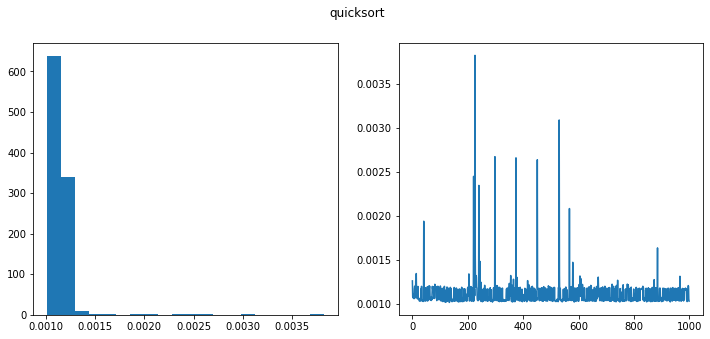

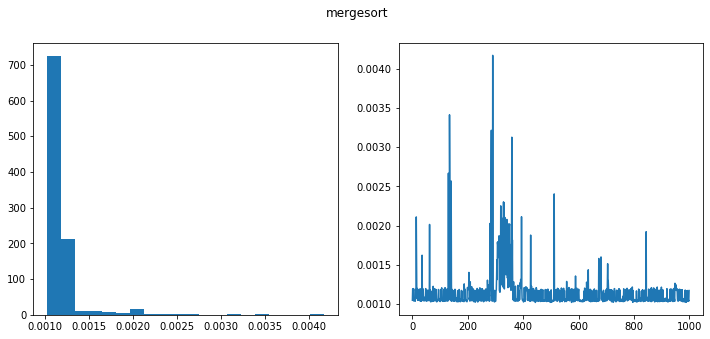

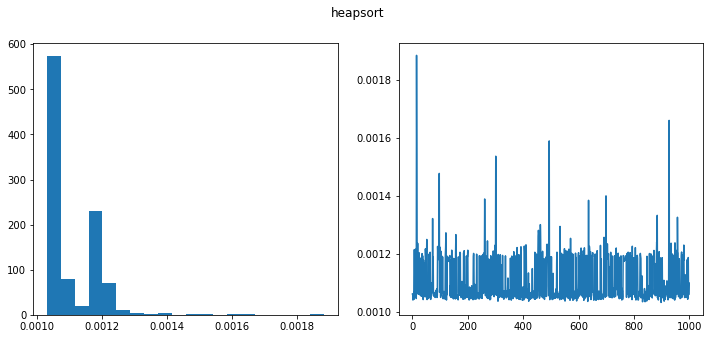

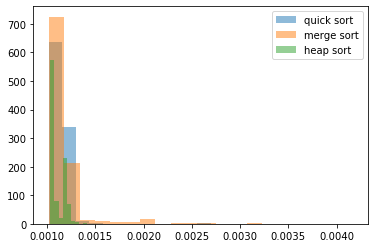

In [30]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_normal)

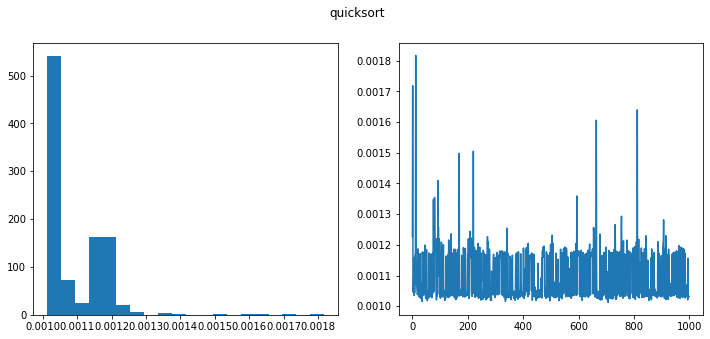

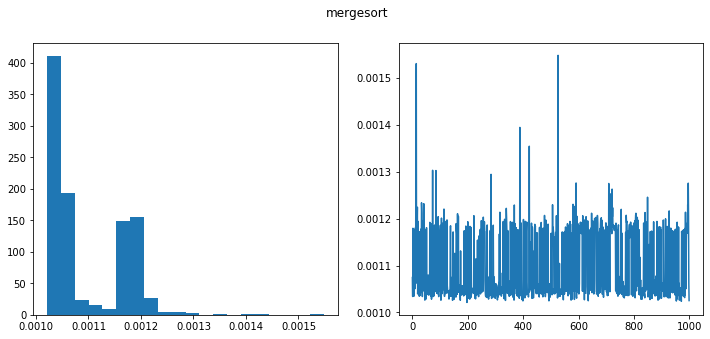

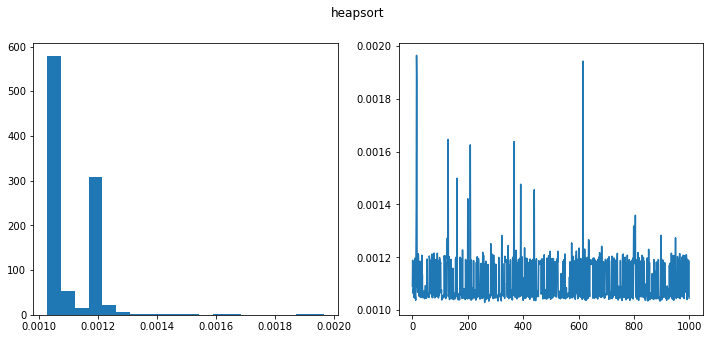

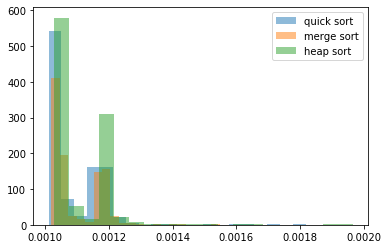

In [31]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform)

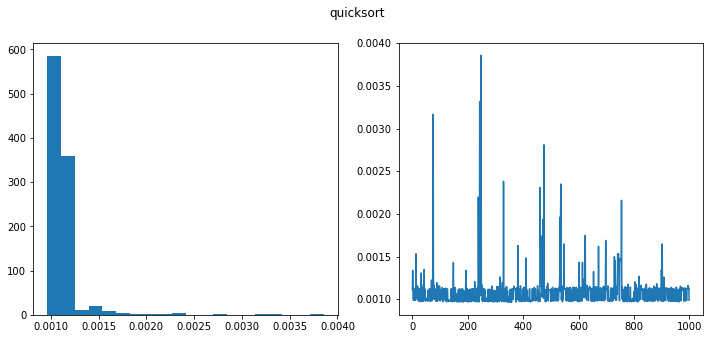

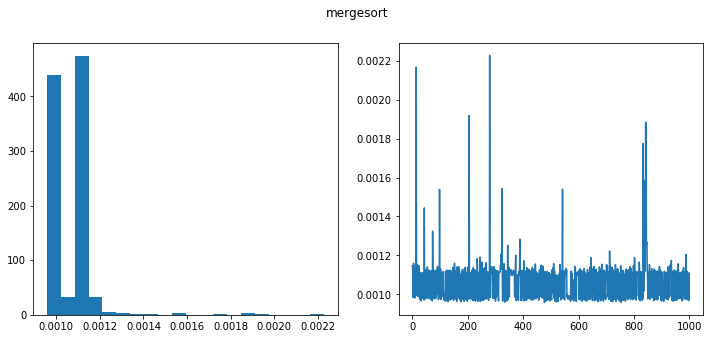

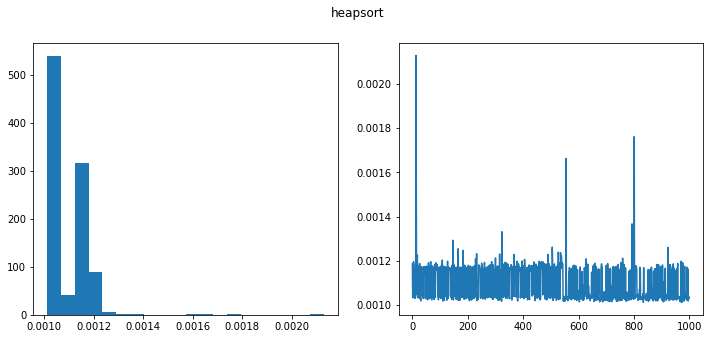

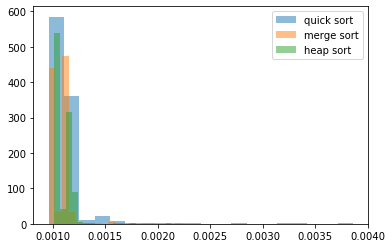

In [32]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_sorted)

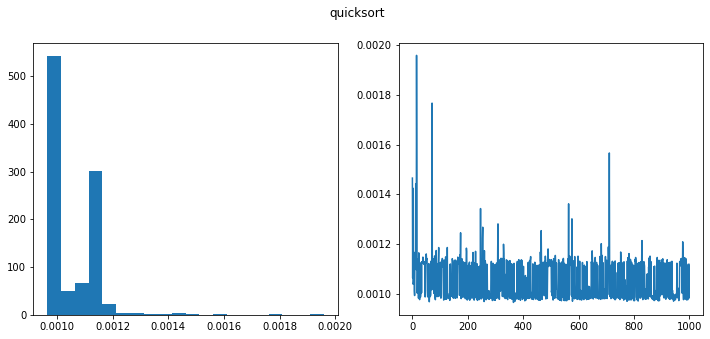

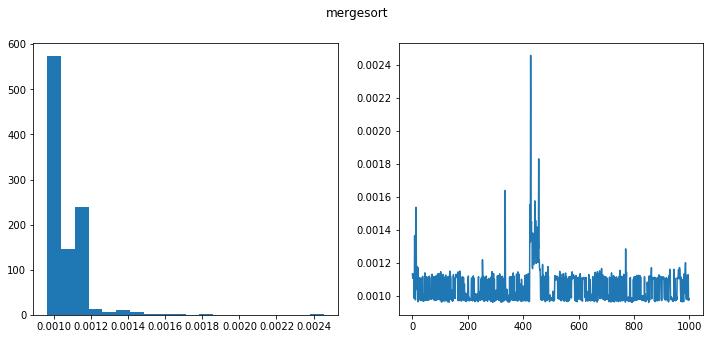

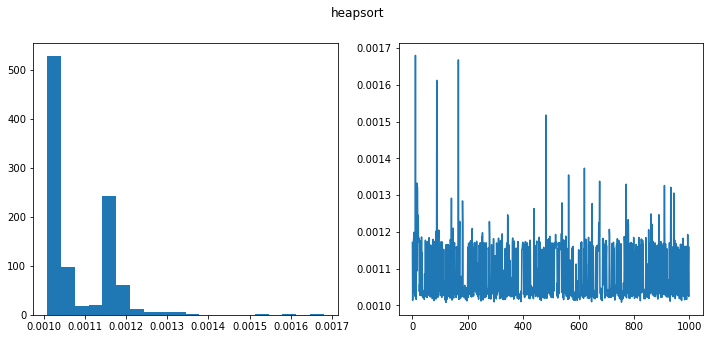

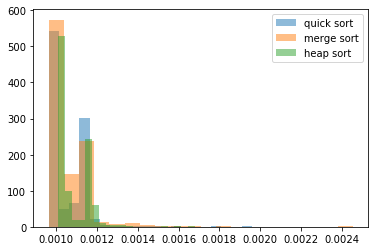

In [33]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean,algo)
plot_runtimes_together(df_uniform_reverse_sorted)

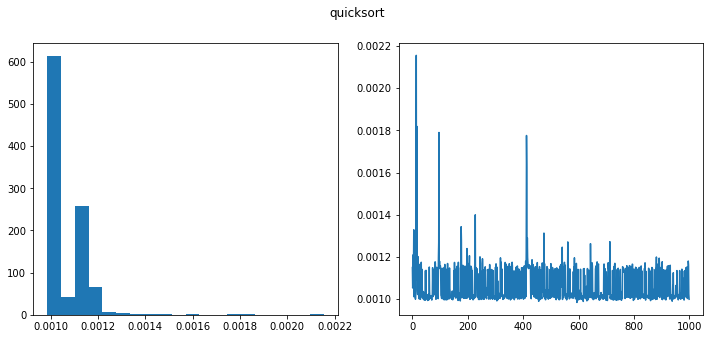

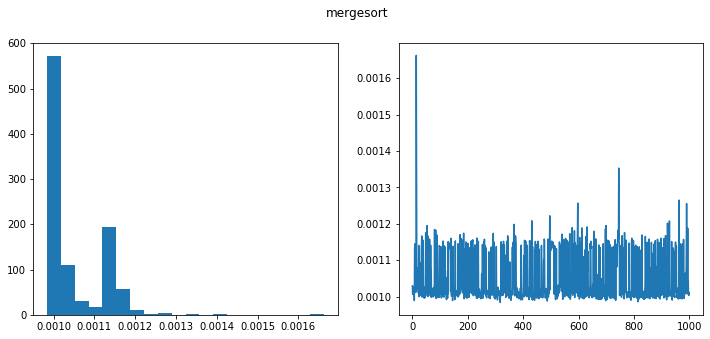

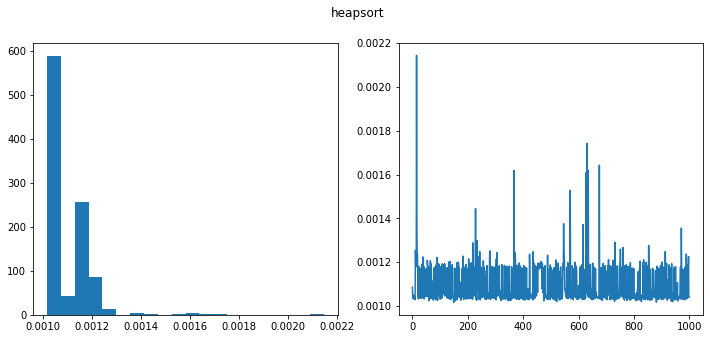

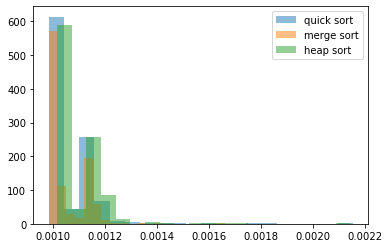

In [34]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_uniform_nearly_sorted)

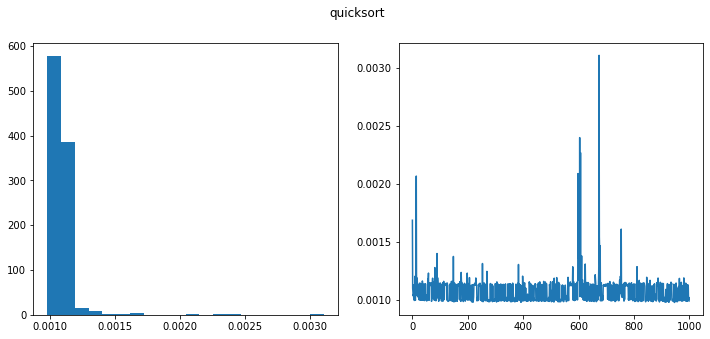

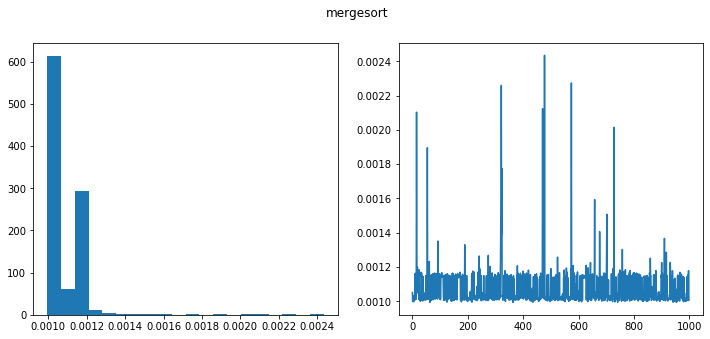

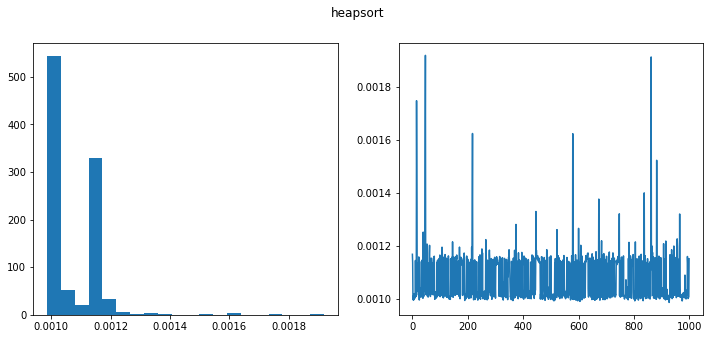

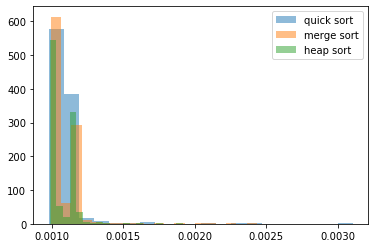

In [35]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_zipf)

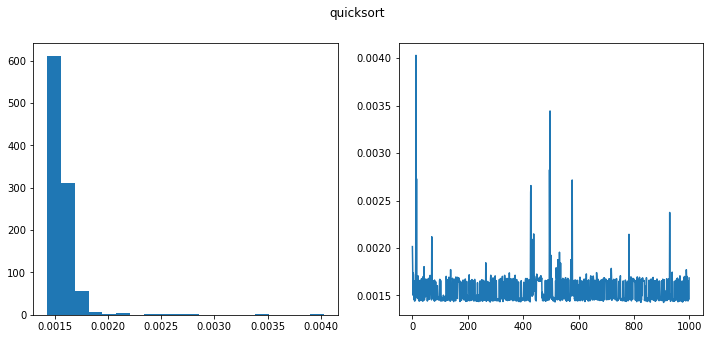

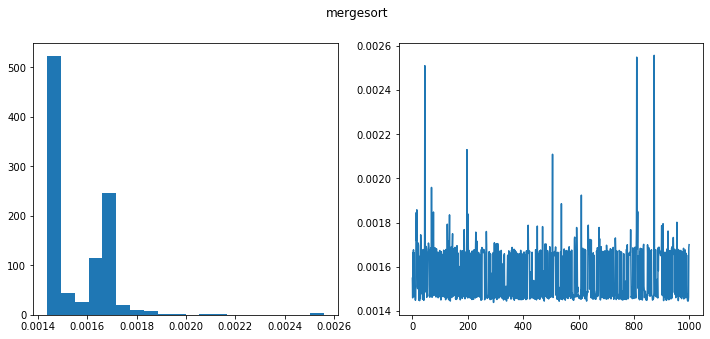

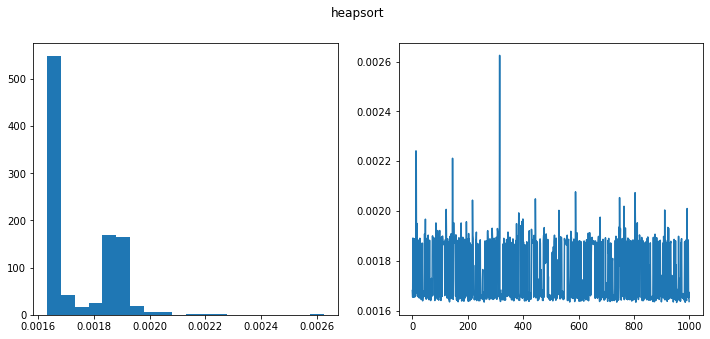

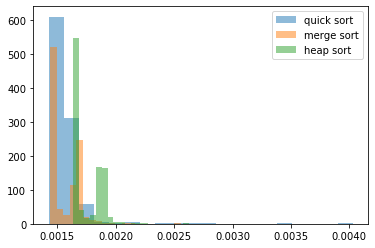

In [36]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_strings, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_strings)

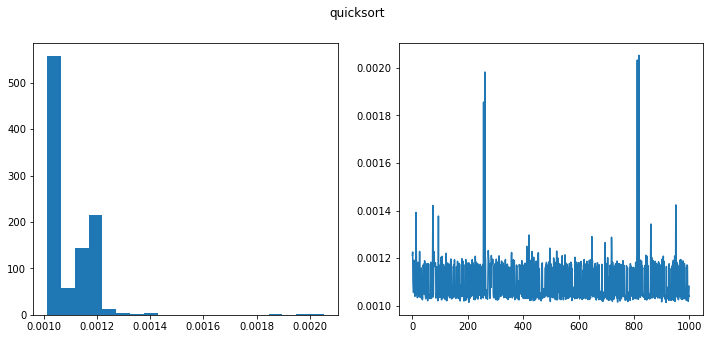

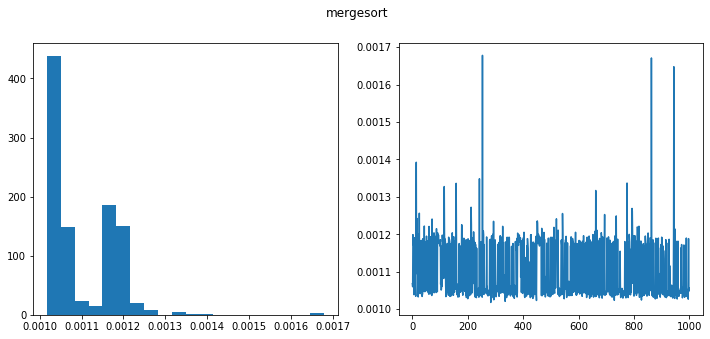

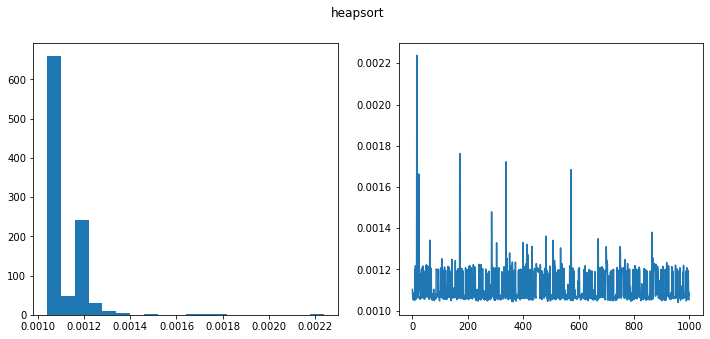

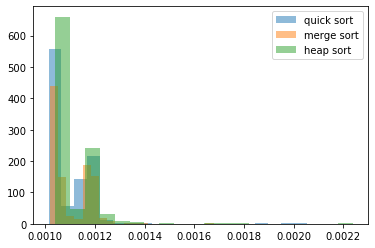

In [37]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_dates, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_dates)

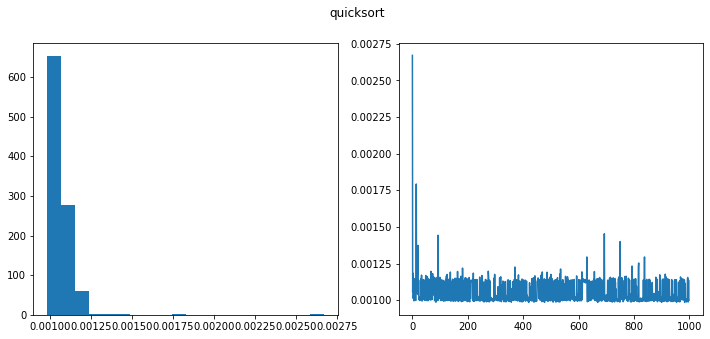

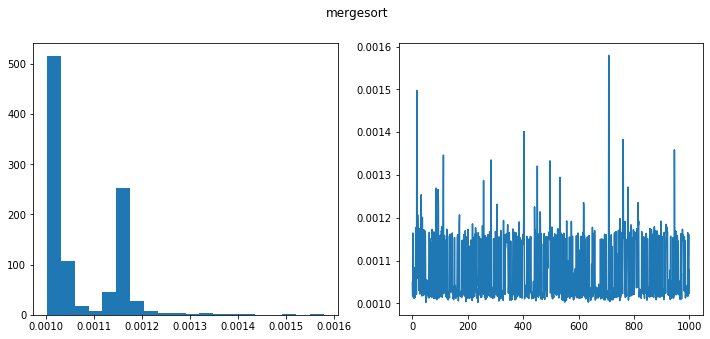

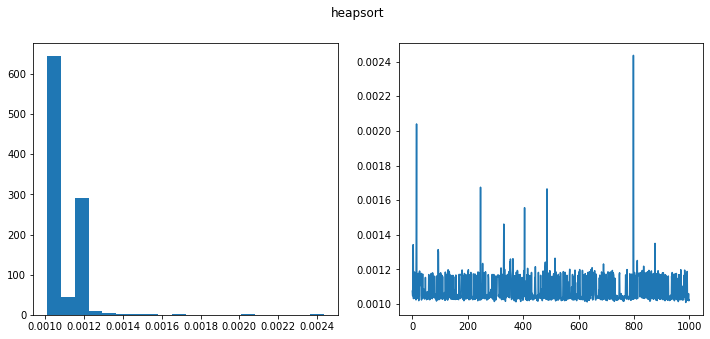

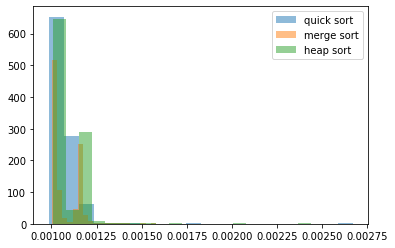

In [38]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers)

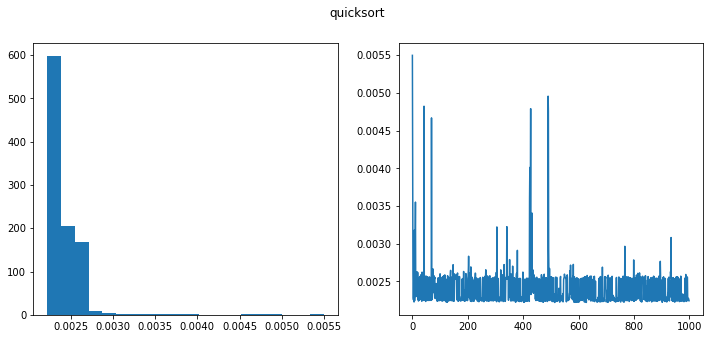

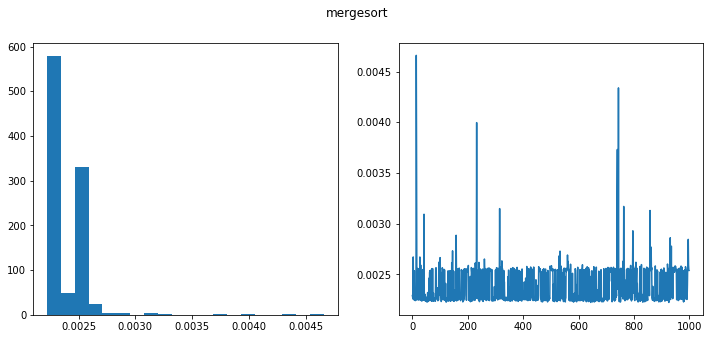

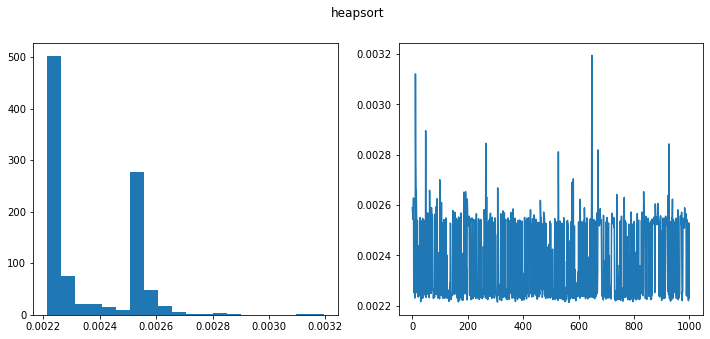

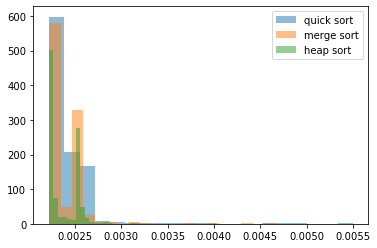

In [39]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_nearly, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_nearly)

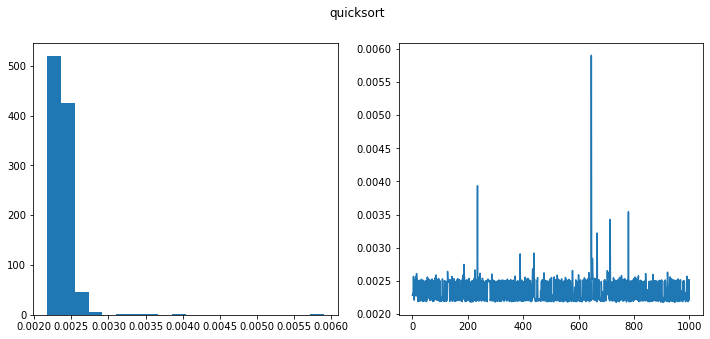

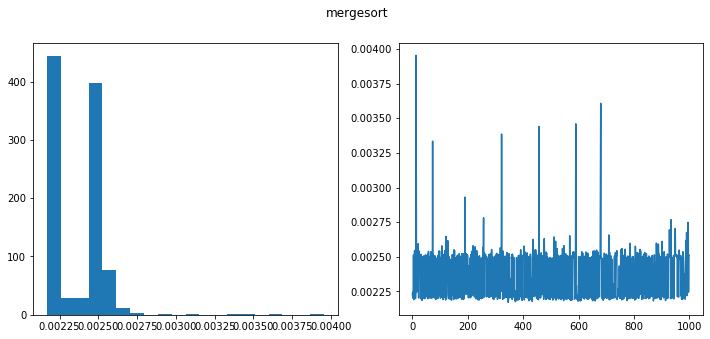

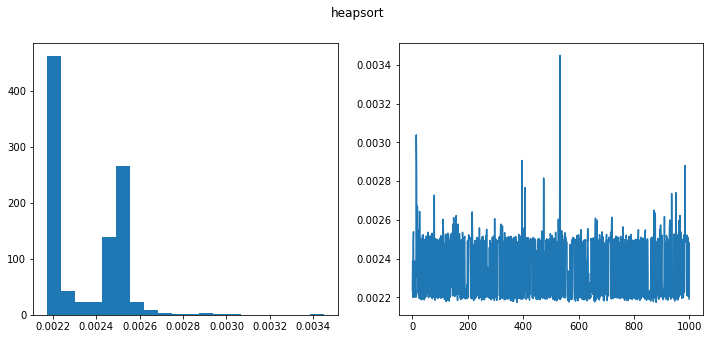

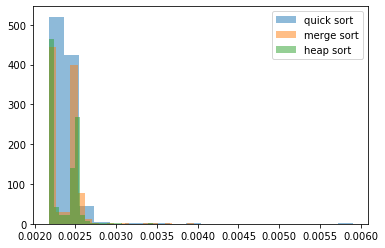

In [40]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uf_reverse, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uf_reverse)

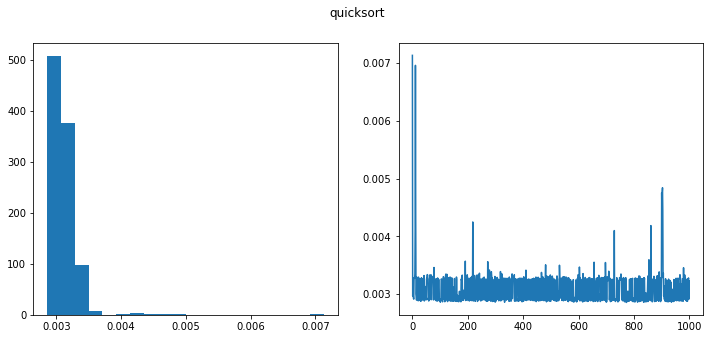

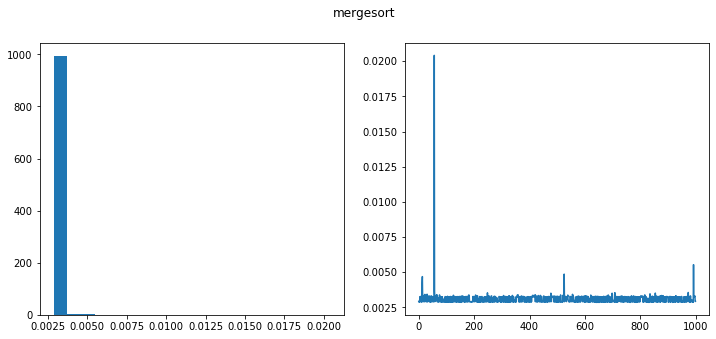

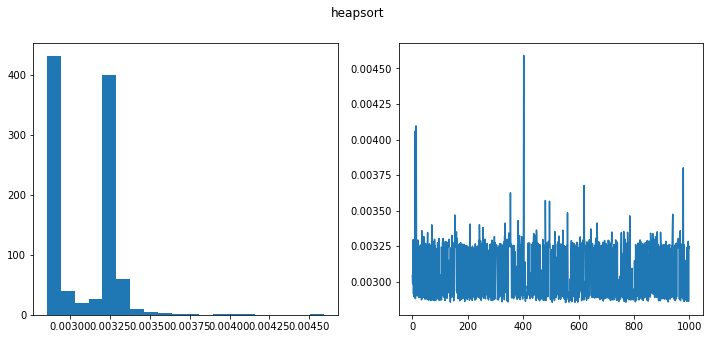

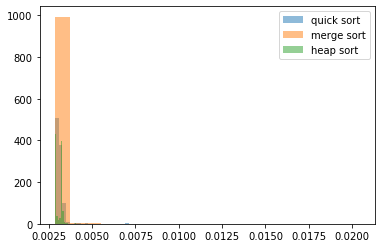

In [41]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_string, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_string)

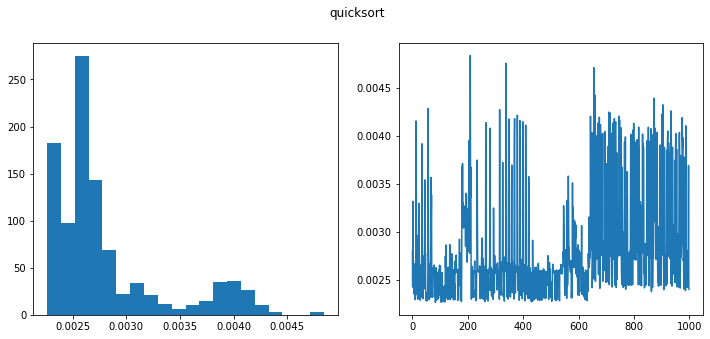

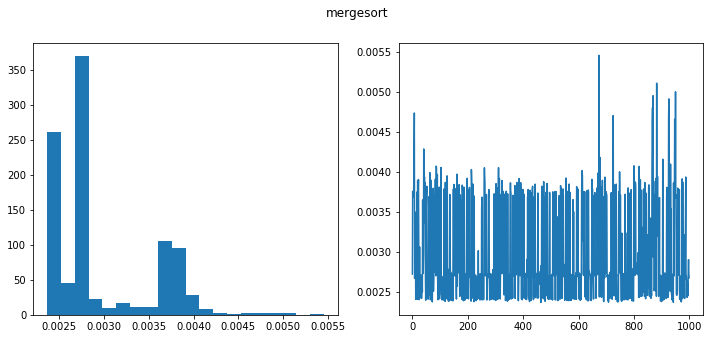

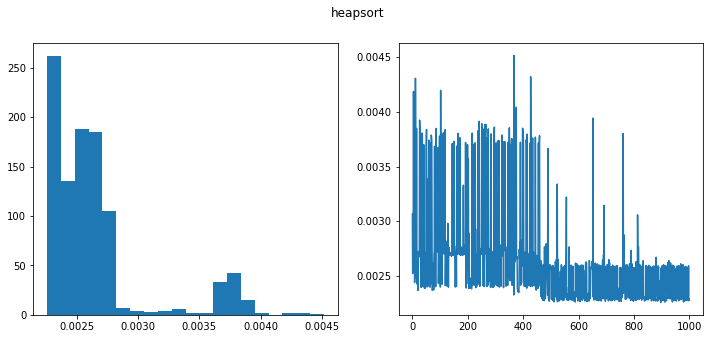

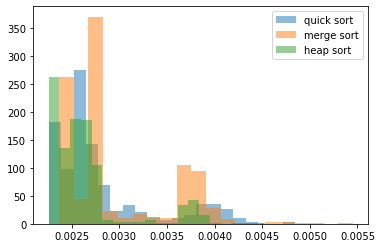

In [42]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_repetetive_numbers_uniform, algo)
    plot_runtimes(df,std,mean, algo)
plot_runtimes_together(df_repetetive_numbers_uniform)
